In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#set graph figure
plt.figure(figsize=(20,10))
sns.set(rc={'figure.figsize':(10, 5)})

%matplotlib inline

## Load Dataset

In [2]:
df_user = pd.read_csv('users.csv')
df_activity = pd.read_csv('user_activity.csv')

In [3]:
df_user.head()

,id,created_at,user_country,age,campaign_source,device,budget_created_at,autosave_created_at,subscription_created_at
0,881965,10/01/2019,GB,21,Influencer,messenger,NaN,NaN,10/01/2019
1,895105,14/01/2019,GB,32,Facebook Ads: General,messenger,14/01/2019,NaN,15/01/2019
2,900657,16/01/2019,GB,37,Friend Referral,messenger,16/01/2019,30/05/2019,16/01/2019
3,935456,27/01/2019,US,29,Facebook Ads: General,messenger,27/01/2019,NaN,27/01/2019
4,956026,05/02/2019,GB,23,Influencer,messenger,05/02/2019,NaN,09/03/2019


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19486 entries, 0 to 19485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       19486 non-null  int64 
 1   created_at               19486 non-null  object
 2   user_country             19486 non-null  object
 3   age                      19486 non-null  int64 
 4   campaign_source          19486 non-null  object
 5   device                   19486 non-null  object
 6   budget_created_at        9218 non-null   object
 7   autosave_created_at      1448 non-null   object
 8   subscription_created_at  4698 non-null   object
dtypes: int64(2), object(7)
memory usage: 1.3+ MB


In [5]:
columns = ['user_country','campaign_source','device']
for column in columns:
    uniques = df_user[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

user_country             2	 ['GB' 'US']
campaign_source          4	 ['Influencer' 'Facebook Ads: General' 'Friend Referral'
 'Facebook Ads: Overdraft Fees']
device                   3	 ['messenger' 'ios' 'android']


In [6]:
df_activity.head()

,user_id,active_date
0,856160,2019-01-01
1,856160,2019-01-02
2,856160,2019-01-06
3,856160,2019-01-08
4,856160,2019-01-09


In [7]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431378 entries, 0 to 431377
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      431378 non-null  int64 
 1   active_date  431378 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.6+ MB


## Retention Rate

### 1. create retention table

In [8]:
df_activity.head()

,user_id,active_date
0,856160,2019-01-01
1,856160,2019-01-02
2,856160,2019-01-06
3,856160,2019-01-08
4,856160,2019-01-09


In [9]:
df_activity['signup_date'] = df_activity.groupby(['user_id'])['active_date'].transform('min')
df_activity['days_since_signup'] = (pd.to_datetime(df_activity['active_date']) - pd.to_datetime(df_activity['signup_date'])).dt.days
df_activity['weeks_since_signup'] = df_activity['days_since_signup']//7 + 1

In [10]:
df_activity.head()

,user_id,active_date,signup_date,days_since_signup,weeks_since_signup
0,856160,2019-01-01,2019-01-01,0,1
1,856160,2019-01-02,2019-01-01,1,1
2,856160,2019-01-06,2019-01-01,5,1
3,856160,2019-01-08,2019-01-01,7,2
4,856160,2019-01-09,2019-01-01,8,2


In [11]:
df_act_unstack = df_activity.groupby(['user_id','weeks_since_signup'])['active_date'].count().unstack().rename_axis(None, axis=1)
df_act_unstack.head()

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
user_id,,,,,,,,,,,,,,,,,,,,,
856160,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,2.0
856503,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856612,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856645,2.0,1.0,1.0,NaN,1.0,4.0,2.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856668,5.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_act_unstack_replace = df_act_unstack.applymap(lambda x: 1 if x >=1 else 0)
df_act_unstack_replace.head()

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
user_id,,,,,,,,,,,,,,,,,,,,,
856160,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,1,1,1
856503,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856612,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856645,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
856668,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# join with user table to create weekly retention dataframe and only keep the first 20 weeks of retention data
df = df_user.merge(df_act_unstack_replace, left_on='id', right_on='user_id')
df = df.drop(columns=[i for i in range(21,59)])
df.head()

,id,created_at,user_country,age,campaign_source,device,budget_created_at,autosave_created_at,subscription_created_at,1,...,11,12,13,14,15,16,17,18,19,20
0,881965,10/01/2019,GB,21,Influencer,messenger,NaN,NaN,10/01/2019,1,...,0,0,0,0,1,0,0,0,0,0
1,895105,14/01/2019,GB,32,Facebook Ads: General,messenger,14/01/2019,NaN,15/01/2019,1,...,1,0,0,0,0,0,0,0,0,0
2,900657,16/01/2019,GB,37,Friend Referral,messenger,16/01/2019,30/05/2019,16/01/2019,1,...,1,1,0,0,1,1,1,0,0,0
3,935456,27/01/2019,US,29,Facebook Ads: General,messenger,27/01/2019,NaN,27/01/2019,1,...,1,0,0,0,0,1,1,0,0,0
4,956026,05/02/2019,GB,23,Influencer,messenger,05/02/2019,NaN,09/03/2019,1,...,0,0,1,0,1,0,0,0,0,0


### 2.Retention Rate Analysis

In [14]:
def retention_rate(df, column_name):
    columns = [i for i in range(1,21)]
    df_rr = df.groupby([column_name])[columns].agg('sum')
    cohort_sizes = df_rr.iloc[:,0]
    retention = df_rr.divide(cohort_sizes, axis=0)
    return retention

#### User segmented by signup month

In [15]:
# assign each user to a cohort based on the month of signup
df['signup_month'] = pd.to_datetime(df['created_at'],format='%d/%m/%Y').dt.to_period('M')
df.head()

,id,created_at,user_country,age,campaign_source,device,budget_created_at,autosave_created_at,subscription_created_at,1,...,12,13,14,15,16,17,18,19,20,signup_month
0,881965,10/01/2019,GB,21,Influencer,messenger,NaN,NaN,10/01/2019,1,...,0,0,0,1,0,0,0,0,0,2019-01
1,895105,14/01/2019,GB,32,Facebook Ads: General,messenger,14/01/2019,NaN,15/01/2019,1,...,0,0,0,0,0,0,0,0,0,2019-01
2,900657,16/01/2019,GB,37,Friend Referral,messenger,16/01/2019,30/05/2019,16/01/2019,1,...,1,0,0,1,1,1,0,0,0,2019-01
3,935456,27/01/2019,US,29,Facebook Ads: General,messenger,27/01/2019,NaN,27/01/2019,1,...,0,0,0,0,1,1,0,0,0,2019-01
4,956026,05/02/2019,GB,23,Influencer,messenger,05/02/2019,NaN,09/03/2019,1,...,0,1,0,1,0,0,0,0,0,2019-02


In [16]:
retention_rate(df,'signup_month')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
signup_month,,,,,,,,,,,,,,,,,,,,
2019-01,1.0,0.641710,0.547668,0.514767,0.484197,0.433938,0.410104,0.397927,0.384456,0.364249,0.347409,0.333161,0.338083,0.342746,0.328756,0.308549,0.318135,0.282902,0.260104,0.253368
2019-02,1.0,0.638743,0.582548,0.514485,0.512740,0.494939,0.441536,0.407330,0.396161,0.414311,0.412914,0.413264,0.377312,0.357417,0.326003,0.318674,0.305061,0.326003,0.305410,0.293543
2019-03,1.0,0.637754,0.587434,0.519878,0.539894,0.511537,0.506811,0.500417,0.471782,0.423408,0.408674,0.398666,0.386433,0.365304,0.359466,0.347790,0.315819,0.290520,0.306366,0.270781
2019-04,1.0,0.646584,0.633776,0.571632,0.552182,0.515655,0.504744,0.455882,0.446395,0.425047,0.416983,0.396584,0.361954,0.351518,0.324004,0.313567,0.295066,0.270398,0.247628,0.240987
2019-05,1.0,0.618693,0.558313,0.526882,0.517783,0.494624,0.483044,0.454094,0.411911,0.396195,0.370554,0.349049,0.330852,0.296940,0.263854,0.268817,0.247312,0.224152,0.208437,0.205128
2019-06,1.0,0.664673,0.590280,0.536449,0.491215,0.456075,0.417570,0.359252,0.352523,0.332336,0.307290,0.273645,0.243364,0.230280,0.207477,0.197383,0.171963,0.159626,0.184673,0.166729
2019-07,1.0,0.681743,0.604523,0.546056,0.498069,0.448428,0.415885,0.396029,0.375069,0.353558,0.310535,0.285714,0.270270,0.242692,0.249862,0.214562,0.196360,0.182019,0.185328,0.161611
2019-08,1.0,0.649742,0.582781,0.545254,0.509198,0.448124,0.388521,0.359088,0.322296,0.311258,0.284032,0.245033,0.215600,0.228845,0.189845,0.181751,0.172185,0.158205,0.141280,0.128771


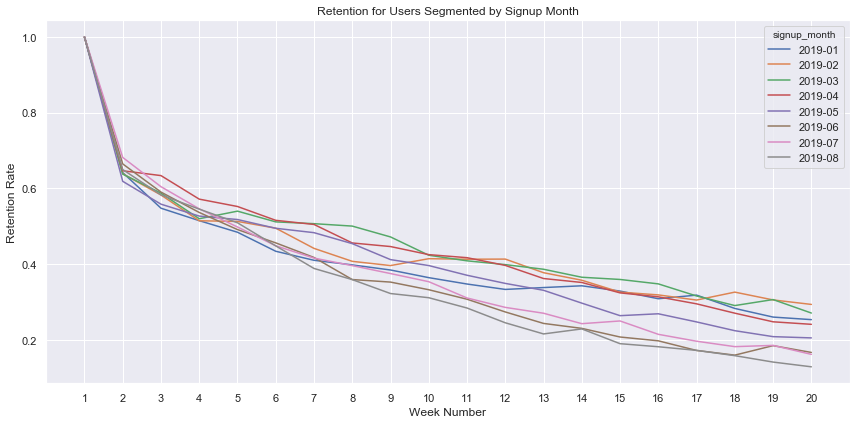

In [17]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
retention_rate(df,'signup_month').T.plot(kind='line', ax=ax)
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0, 21)
ax.set_title('Retention for Users Segmented by Signup Month')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

#### User segmented by campaign source

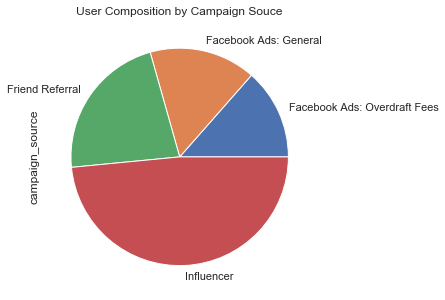

In [18]:
df['campaign_source'].value_counts().sort_values(ascending=True).plot(kind='pie',figsize=(10,5),title = 'User Composition by Campaign Souce')

In [19]:
retention_rate(df,'campaign_source')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
campaign_source,,,,,,,,,,,,,,,,,,,,
Facebook Ads: General,1.0,0.660518,0.620712,0.553398,0.543366,0.512945,0.482524,0.447896,0.435275,0.424919,0.417476,0.393851,0.387055,0.375728,0.355663,0.348220,0.342718,0.317799,0.305502,0.300971
Facebook Ads: Overdraft Fees,1.0,0.719165,0.675522,0.644023,0.615939,0.575332,0.538140,0.532448,0.494497,0.480835,0.452751,0.432258,0.408729,0.384820,0.371157,0.370778,0.337381,0.312334,0.297154,0.287287
Friend Referral,1.0,0.556637,0.472319,0.423211,0.405374,0.373639,0.361362,0.334492,0.327774,0.303220,0.293028,0.291406,0.276813,0.270327,0.252027,0.234422,0.231642,0.208710,0.211953,0.193885
Influencer,1.0,0.663914,0.596887,0.540555,0.521707,0.481364,0.449915,0.418149,0.397395,0.376429,0.354087,0.331533,0.307603,0.295002,0.275201,0.258365,0.239411,0.230623,0.226069,0.205316


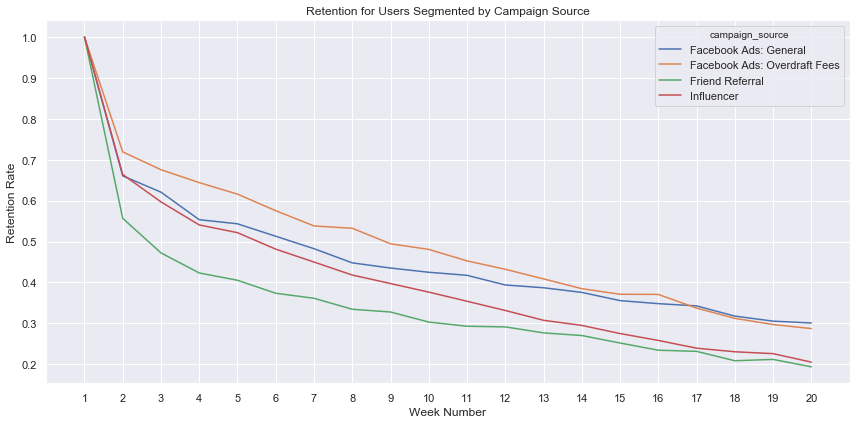

In [20]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
retention_rate(df,'campaign_source').T.plot(kind='line', ax=ax)
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0, 21)
ax.set_title('Retention for Users Segmented by Campaign Source')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

#### User segmented by device

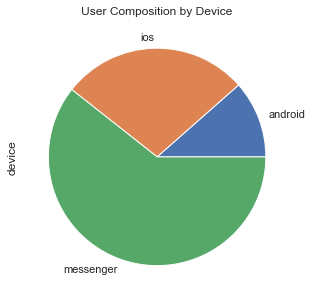

In [21]:
df['device'].value_counts().sort_values(ascending=True).plot(kind='pie',figsize=(10,5),title = 'User Composition by Device')

In [22]:
retention_rate(df,'device')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
device,,,,,,,,,,,,,,,,,,,,
android,1.0,0.681980,0.636039,0.582516,0.572703,0.539697,0.495986,0.466994,0.451383,0.433988,0.412132,0.386262,0.369759,0.357270,0.337199,0.328278,0.309099,0.294826,0.293488,0.254237
ios,1.0,0.678946,0.617241,0.563087,0.543194,0.508565,0.473752,0.444281,0.429361,0.411125,0.386443,0.359735,0.331369,0.324738,0.303002,0.278504,0.259716,0.249770,0.250691,0.225824
messenger,1.0,0.625815,0.558358,0.505798,0.486331,0.447651,0.426069,0.399577,0.378587,0.358781,0.344477,0.332289,0.316970,0.301650,0.284638,0.275667,0.262886,0.242658,0.233432,0.225730


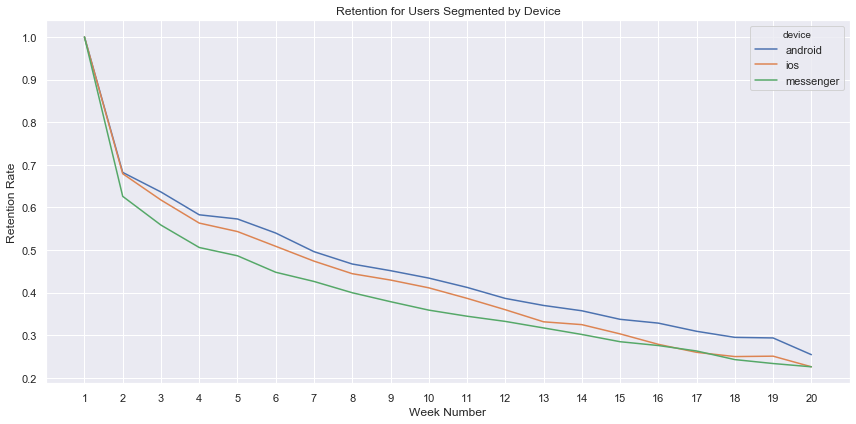

In [23]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
retention_rate(df,'device').T.plot(kind='line', ax=ax)
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0, 21)
ax.set_title('Retention for Users Segmented by Device')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

#### User segmented by Age Group

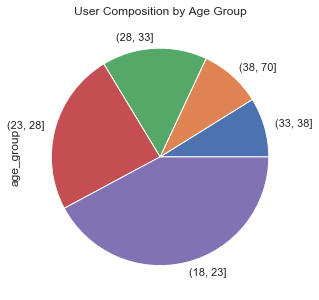

In [24]:
df['age_group'] = pd.cut(df['age'], [18, 23, 28, 33, 38, 70])
df['age_group'].value_counts().sort_values(ascending=True).plot(kind='pie',figsize=(10,5),title = 'User Composition by Age Group')

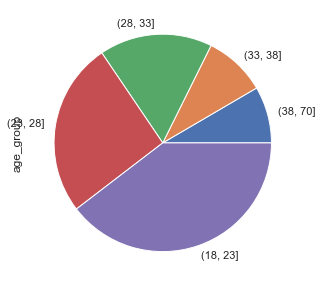

In [25]:
df[df['campaign_source'] == 'Influencer']['age_group'].value_counts().sort_values(ascending=True).plot(kind='pie',figsize=(10,5))

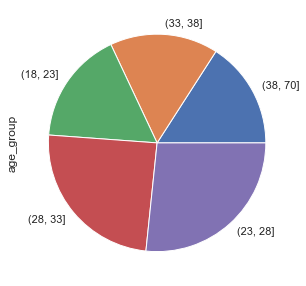

In [26]:
df[(df['campaign_source'] == 'Facebook Ads: Overdraft Fees')]['age_group'].value_counts().sort_values(ascending=True).plot(kind='pie',figsize=(10,5))

In [27]:
retention_rate(df,'age_group')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
age_group,,,,,,,,,,,,,,,,,,,,
"(18, 23]",1.0,0.583996,0.518659,0.462498,0.442432,0.410987,0.387740,0.364982,0.348587,0.330356,0.322648,0.303683,0.301970,0.280803,0.260370,0.255231,0.239325,0.225132,0.222440,0.204576
"(23, 28]",1.0,0.671005,0.611265,0.559420,0.540218,0.493279,0.468743,0.439514,0.418605,0.403243,0.374867,0.360999,0.326862,0.332409,0.311713,0.294218,0.281843,0.259441,0.257734,0.243866
"(28, 33]",1.0,0.701882,0.630901,0.586332,0.569495,0.537141,0.504127,0.476725,0.446022,0.434797,0.407725,0.395180,0.362166,0.348960,0.329152,0.317927,0.281611,0.274678,0.260812,0.247937
"(33, 38]",1.0,0.721769,0.672875,0.612340,0.596624,0.552969,0.512224,0.485448,0.474971,0.447031,0.419092,0.396391,0.356810,0.342258,0.332945,0.305588,0.308498,0.279977,0.270081,0.257858
"(38, 70]",1.0,0.710349,0.646232,0.598988,0.582115,0.551181,0.507874,0.461755,0.453318,0.415636,0.402700,0.372328,0.359393,0.336333,0.326209,0.296963,0.292463,0.275028,0.267154,0.242970


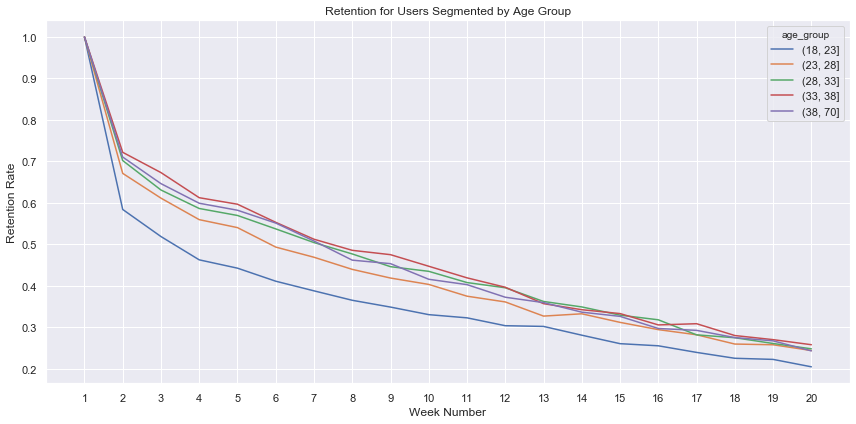

In [28]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
retention_rate(df,'age_group').T.plot(kind='line', ax=ax)
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0, 21)
ax.set_title('Retention for Users Segmented by Age Group')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

#### User segmented by country

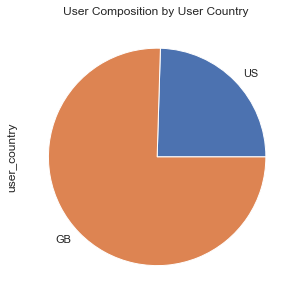

In [29]:
df['user_country'].value_counts().sort_values(ascending=True).plot(kind='pie',figsize=(10,5),title = 'User Composition by User Country ')

In [30]:
retention_rate(df,'user_country')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
user_country,,,,,,,,,,,,,,,,,,,,
GB,1.0,0.613000,0.546573,0.485586,0.470424,0.434185,0.415488,0.389516,0.368915,0.348790,0.336076,0.321458,0.307180,0.296301,0.281547,0.270261,0.257411,0.240821,0.236810,0.220424
US,1.0,0.751988,0.697991,0.669108,0.640435,0.601507,0.545626,0.512976,0.500209,0.484303,0.449770,0.422143,0.388238,0.370448,0.339682,0.320218,0.297823,0.280871,0.270825,0.255546


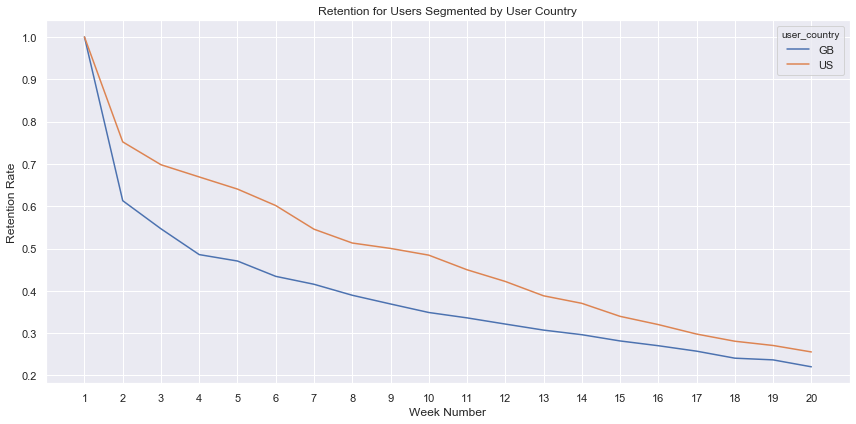

In [31]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
retention_rate(df,'user_country').T.plot(kind='line', ax=ax)
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0, 21)
ax.set_title('Retention for Users Segmented by User Country')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

#### User segmented by behavioral activity

In [32]:
df['budget_setup_days'] = (pd.to_datetime(df['budget_created_at'],format='%d/%m/%Y') - pd.to_datetime(df['created_at'],format='%d/%m/%Y')).dt.days
df['autosave_setup_days'] = (pd.to_datetime(df['autosave_created_at'],format='%d/%m/%Y') - pd.to_datetime(df['created_at'],format='%d/%m/%Y')).dt.days
df['subscription_setup_days'] = (pd.to_datetime(df['subscription_created_at'],format='%d/%m/%Y') - pd.to_datetime(df['created_at'],format='%d/%m/%Y')).dt.days

In [33]:
df['budget_setup_days'].value_counts().sort_index().head(7).sum()

6859

In [34]:
df['autosave_setup_days'].value_counts().sort_index().head(7).sum()

276

In [35]:
df['subscription_setup_days'].value_counts().sort_index().head(8).sum()

2266

In [36]:
def set_budget_activity_type(x):
    if x <7: 
        return 'Set budget - within 7 days'
    elif x >7: 
        return 'Set budget - after 7 days'
    else: 
        return 'Never set budget'
def subscription_activity_type(x):
    if x <7: 
        return 'Subscribe - within 7 days'
    elif x >7: 
        return 'Subscribe - after 7 days'
    else: 
        return 'Never upgrade to plus'
    
    
df['budget_setup_category'] = df['budget_setup_days'].apply(lambda x: set_budget_activity_type(x) )
df['subscription_setup_category'] = df['subscription_setup_days'].apply(lambda x: subscription_activity_type(x))

In [37]:
df.head()

,id,created_at,user_country,age,campaign_source,device,budget_created_at,autosave_created_at,subscription_created_at,1,...,18,19,20,signup_month,age_group,budget_setup_days,autosave_setup_days,subscription_setup_days,budget_setup_category,subscription_setup_category
0,881965,10/01/2019,GB,21,Influencer,messenger,NaN,NaN,10/01/2019,1,...,0,0,0,2019-01,"(18, 23]",NaN,NaN,0.0,Never set budget,Subscribe - within 7 days
1,895105,14/01/2019,GB,32,Facebook Ads: General,messenger,14/01/2019,NaN,15/01/2019,1,...,0,0,0,2019-01,"(28, 33]",0.0,NaN,1.0,Set budget - within 7 days,Subscribe - within 7 days
2,900657,16/01/2019,GB,37,Friend Referral,messenger,16/01/2019,30/05/2019,16/01/2019,1,...,0,0,0,2019-01,"(33, 38]",0.0,134.0,0.0,Set budget - within 7 days,Subscribe - within 7 days
3,935456,27/01/2019,US,29,Facebook Ads: General,messenger,27/01/2019,NaN,27/01/2019,1,...,0,0,0,2019-01,"(28, 33]",0.0,NaN,0.0,Set budget - within 7 days,Subscribe - within 7 days
4,956026,05/02/2019,GB,23,Influencer,messenger,05/02/2019,NaN,09/03/2019,1,...,0,0,0,2019-02,"(18, 23]",0.0,NaN,32.0,Set budget - within 7 days,Subscribe - after 7 days


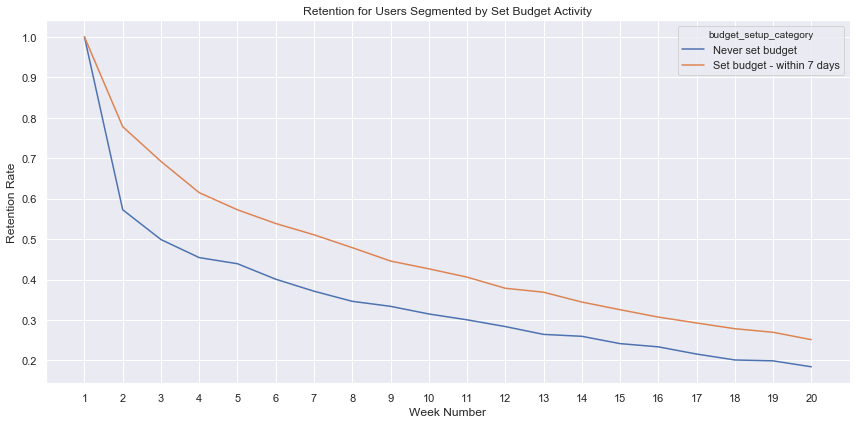

In [38]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
retention_rate(df[df['budget_setup_category']!='Set budget - after 7 days'],'budget_setup_category').T.plot(kind='line', ax=ax)
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0, 21)
ax.set_title('Retention for Users Segmented by Set Budget Activity')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

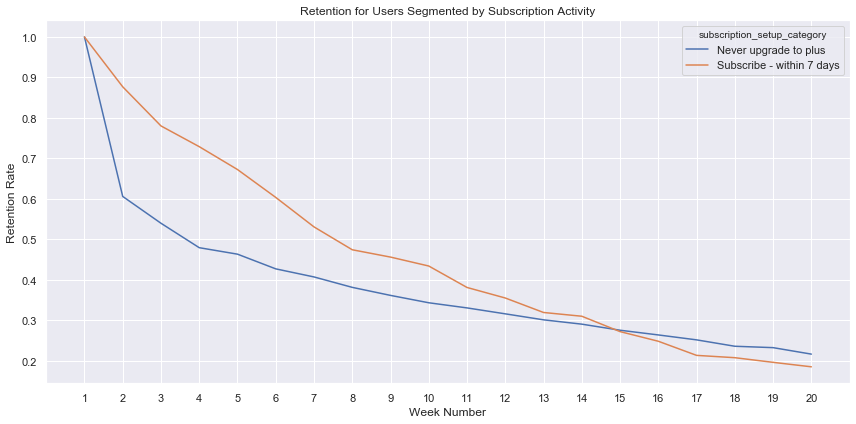

In [39]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
retention_rate(df[df['subscription_setup_category']!='Subscribe - after 7 days'],'subscription_setup_category').T.plot(kind='line', ax=ax)
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0, 21)
ax.set_title('Retention for Users Segmented by Subscription Activity')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()